<a href="https://colab.research.google.com/github/yashhhp/FMCG-analytics/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/segmentation data.csv',index_col=0)

In [5]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [8]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


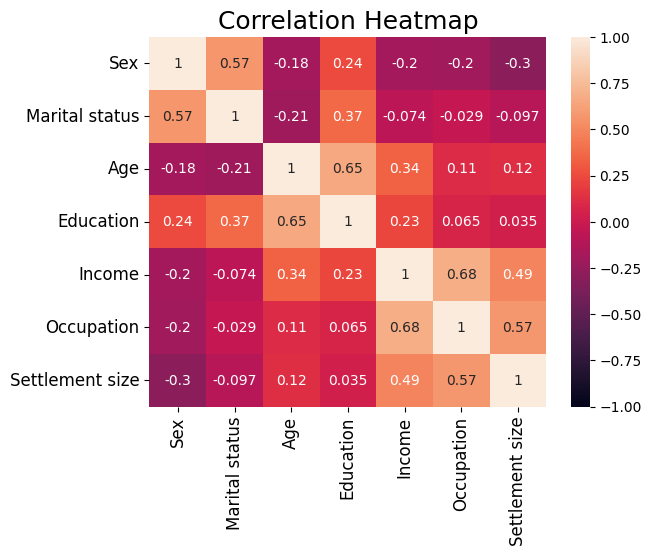

In [14]:

s = sns.heatmap(df.corr(), annot = True, vmin = -1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize =12) 
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize =12) 
plt.title('Correlation Heatmap', fontsize =18)
plt.show()

Text(0.5, 1.0, 'Visualisation of Raw Data')

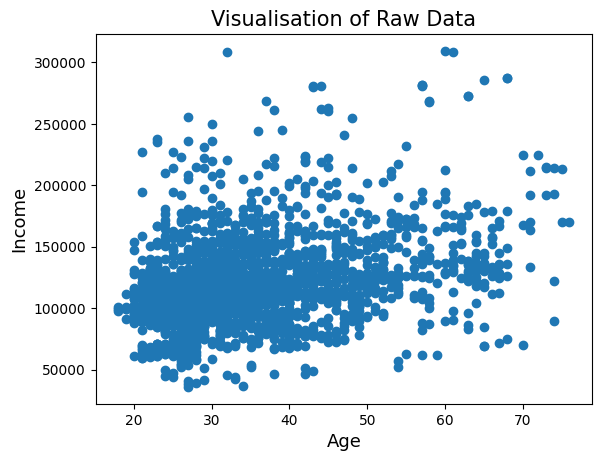

In [18]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Income', fontsize = 13)
plt.title('Visualisation of Raw Data', fontsize = 15)

<Axes: xlabel='Occupation', ylabel='Income'>

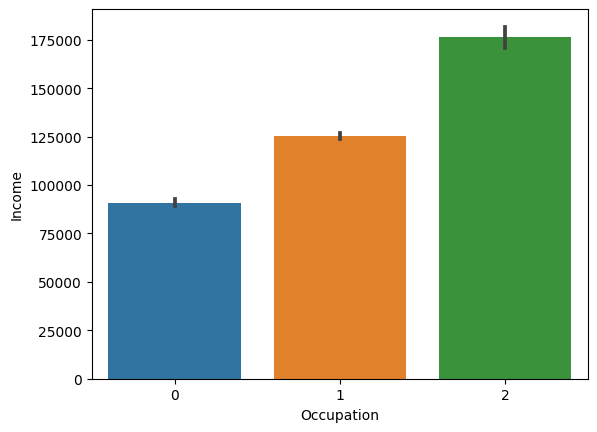

In [23]:

sns.barplot(x = 'Occupation',y = 'Income',data = df)

Standard Scaling

In [26]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()

In [27]:
sc_df=sc.fit_transform(df)

**Customer segmentation using clustering algorithms**

In [30]:
from sklearn.cluster import KMeans
wcss = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(sc_df)
    wcss[i] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'K-means Clustering - Elbow Method')

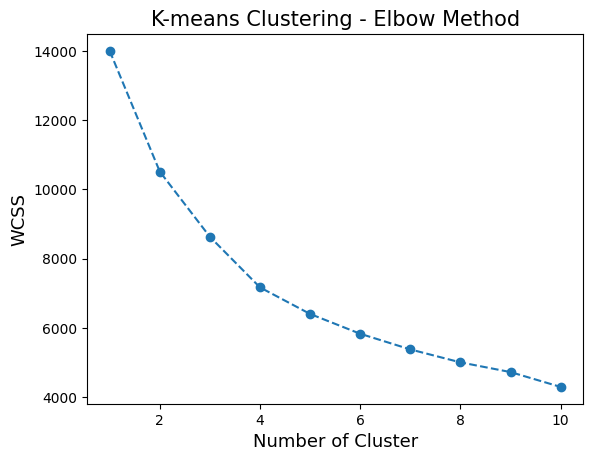

In [31]:
plt.plot(list(wcss.keys()), list(wcss.values()),  marker = 'o', linestyle = '--' )
plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS', fontsize = 13)
plt.title('K-means Clustering - Elbow Method', fontsize = 15)

In [33]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from kneed import KneeLocator
x, y = list(wcss.keys()), list(wcss.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('Number of clusters ', kn.knee)

Number of clusters  4


In [35]:
kmeans =KMeans(n_clusters =4, max_iter = 500,  init = 'k-means++', random_state= 42)
kmeans.fit(sc_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=4, random_state=42)

In [41]:
df_kmeans = df.copy()
df_kmeans['Segment_KMeans'] = kmeans.labels_
df_kmeans['Segment_KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)


In [46]:
df_kmeans.tail()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment_KMeans
ID,,,,,,,,
100001996,1,0,47,1,123525,0,0,B
100001997,1,1,27,1,117744,1,0,C
100001998,0,0,31,0,86400,0,0,B
100001999,1,1,24,1,97968,0,0,C
100002000,0,0,25,0,68416,0,0,B


In [43]:
df_segm_analysis = df_kmeans.groupby(['Segment_KMeans']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_KMeans,,,,,,,
A,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
B,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
C,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
D,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [45]:
df_segm_analysis['N_Obs'] = df_kmeans[['Segment_KMeans', 'Sex']].groupby(['Segment_KMeans'])['Sex'].count()
df_segm_analysis['Prop_Obs'] = df_segm_analysis.N_Obs / df_segm_analysis.N_Obs.sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Prop_Obs
Segment_KMeans,,,,,,,,,
A,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
B,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
C,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
D,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850




1.   The Segment A is composed of men and women almost equally with an average age of 55.7. This is the oldest segment. Almost 70% of customers in Segment A are in relationships and they also have the highest level of education as well as the highest income. This segment can be named as "Well_Off" individuals.
2. Two thirds of people in Segment B are male and almost all are single. Their average age is 36 years. Their education level is low on average compared to other segments in terms of salary and jobs. This segment has the lowest values under 100,000 for annual salary. Also, they live almost exclusively in small cities. These people are considered as people in their thirties with a relatively low income living in small cities. This segment of people can be named as "Fewer_Opportunities".
3. Segment C is comprised almost entirely of men. Less than 20 percent of whom are in relationships. Looking at the numbers we observe relatively low values for education paired with high values for income and occupation. Most of this segment lives in big or middle-sized cities. It appears people in this segment are "Career_Oriented".
4. Individuals in the Segment D are in relationships with an average age of 29. This is the youngest segment. They have a medium level of education average income and middle management jobs. They seem equally distributed between small mid-sized and big cities. So, they seem average in just about every parameter. We can label the segment average or "Standard".




In [47]:
df_segm_analysis.rename({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' }, inplace =True)

In [48]:
df_kmeans['Labels']  = df_kmeans['Segment_KMeans'].map({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' })

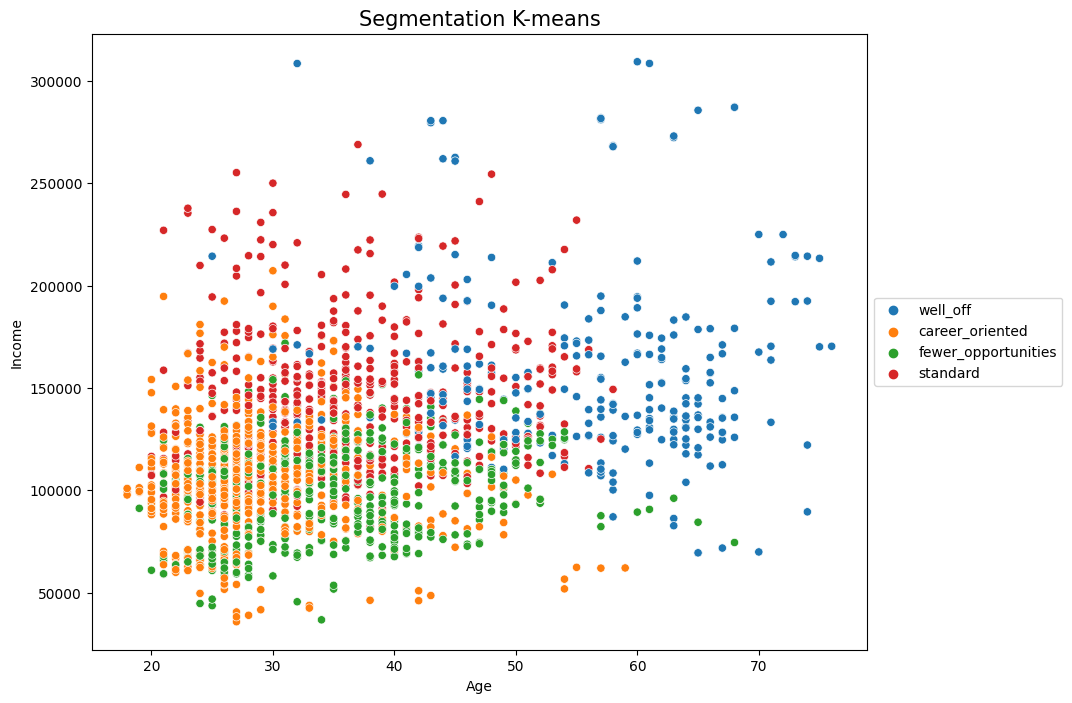

In [57]:
x_axis = df_kmeans['Age']
y_axis = df_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_kmeans, x="Age",y="Income",hue=df_kmeans['Labels'])
plt.title('Segmentation K-means',fontsize = 15)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()



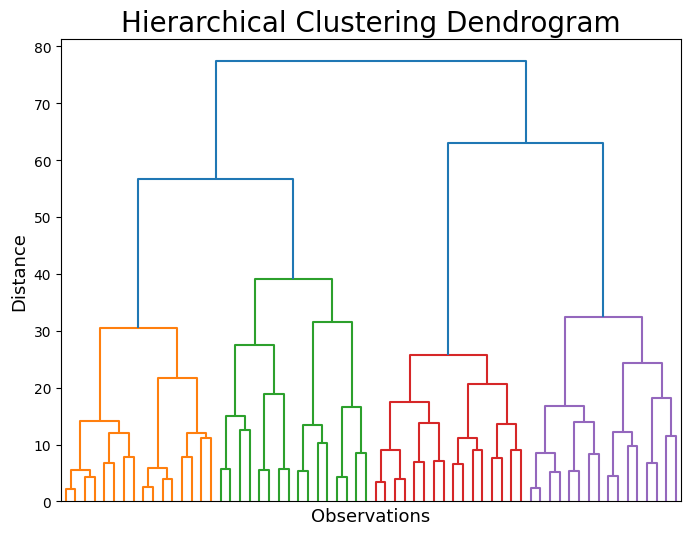

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
hier_clust = linkage(sc_df, method = 'ward')
plt.figure(figsize =(8,6))
plt.title('Hierarchical Clustering Dendrogram', fontsize =20)
plt.ylabel('Distance',  fontsize =13)
plt.xlabel('Observations',  fontsize =13)
dendrogram(hier_clust, show_leaf_counts =False,
           truncate_mode = 'level', 
           p = 5, 
           no_labels = True, 
          )

plt.show()


In [59]:
from sklearn.decomposition import PCA 
pca = PCA() 
pca.fit(sc_df)

PCA()

In [60]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

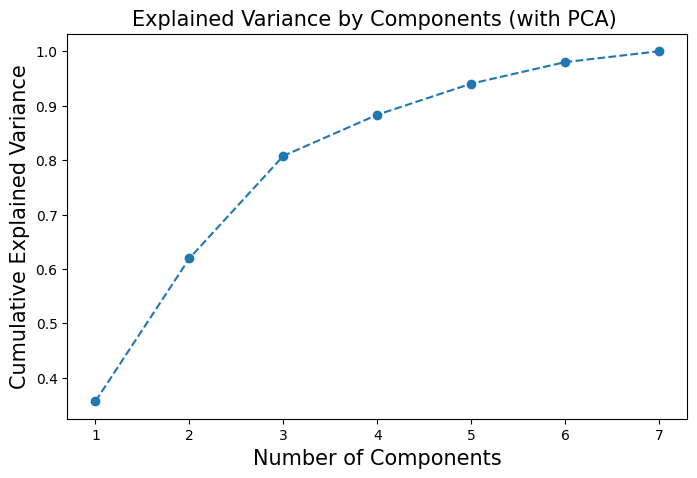

In [61]:
plt.figure(figsize =(8,5))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components (with PCA) ', fontsize= 15)
plt.xlabel('Number of Components', fontsize= 15)
plt.ylabel('Cumulative Explained Variance', fontsize= 15)


Although we could take all 7 components to earn 100 percent of the information. However, then we cannot take advantages of PCA, which is to reduce the dimensionality of features. Rule of thumb is to keep at least 70 to 80 percent of the explained variance. According to the plot, 3 components will keep almost 80 percent of the initial variability

In [64]:
pca= PCA(n_components =3)
pca.fit(sc_df)

PCA(n_components=3)

In [65]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [67]:
df_pca_comp = pd.DataFrame(data = pca.components_, columns =df.columns.values, 
                          index = ['component_1', 'component_2', 'component_3'])


In [68]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [69]:
scores_pca = pca.transform(sc_df)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [70]:
wcss_pca =  {}
for i in range(1, 11): 
    kmeans_pca = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca) # Note that the component scores are standardized by definition
    wcss_pca[i] = kmeans_pca.inertia_ 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'K-means Clustering with PCA clustering')

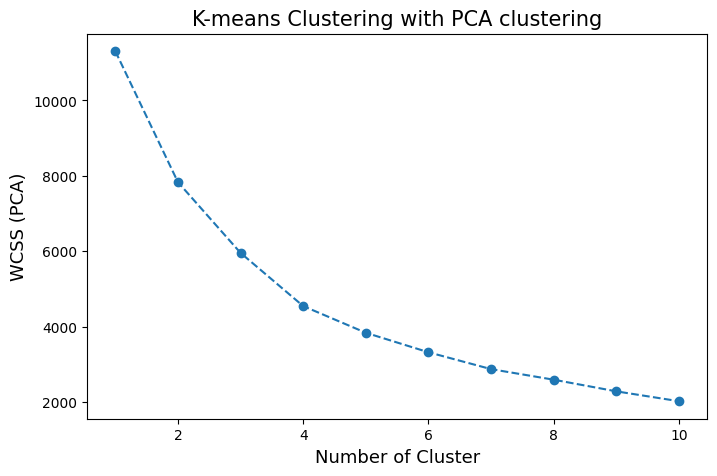

In [71]:
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(wcss_pca.keys()), list(wcss_pca.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS (PCA)', fontsize = 13)
plt.title('K-means Clustering with PCA clustering', fontsize = 15)

In [72]:
x, y = list(wcss_pca.keys()), list(wcss_pca.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('Number of clusters: ', kn.knee)

Number of clusters:  4


In [73]:
kmeans_pca = KMeans(n_clusters =4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [75]:
df_seg_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis =1)
df_seg_pca_kmeans.columns.values[-3:] =  ['component_1', 'component_2', 'component_3']
df_seg_pca_kmeans['Segment_KMeans_PCA'] = kmeans_pca.labels_
df_seg_pca_kmeans['Segment_KMeans_PCA'].replace({0: "W", 1: "X", 2: "Y", 3:"Z"}, inplace=True)

In [76]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby(['Segment_KMeans_PCA']).mean()
df_seg_pca_kmeans_freq['N_Obs'] = df_seg_pca_kmeans[['Segment_KMeans_PCA', 'Sex']].groupby(['Segment_KMeans_PCA'])['Sex'].count()
df_seg_pca_kmeans_freq['Prop_Obs'] = df_seg_pca_kmeans_freq.N_Obs / df_seg_pca_kmeans_freq.N_Obs.sum()
df_seg_pca_kmeans_freq


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,N_Obs,Prop_Obs
Segment_KMeans_PCA,,,,,,,,,,,,
W,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
X,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Y,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Z,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [77]:
df_seg_pca_kmeans_freq.rename({'Z':'well-off', 'Y': 'fewer-opportunities', 
                        'W': 'standard', 'X': 'career_focused'}, inplace =True)

df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,N_Obs,Prop_Obs
Segment_KMeans_PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career_focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer-opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


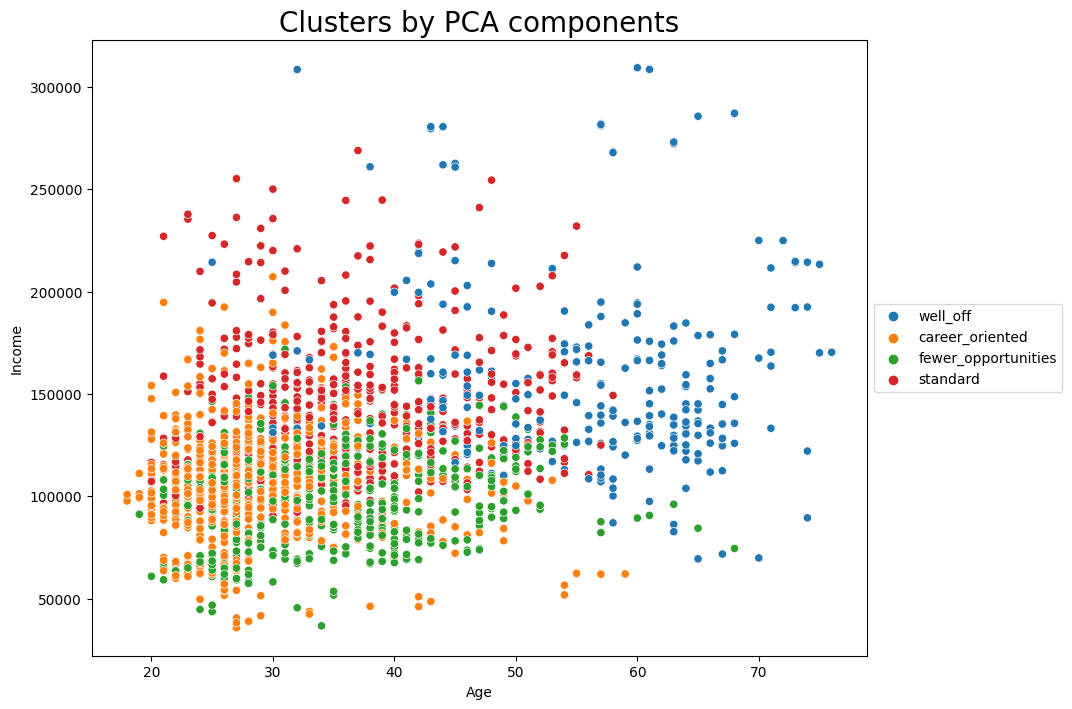

In [79]:
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment_KMeans_PCA'].map({'Z':'well-off', 'Y': 'fewer-opportunities', 
                        'W': 'standard', 'X': 'career_focused'})
x_axis = df_seg_pca_kmeans['component_2']
y_axis = df_seg_pca_kmeans['component_1']
plt.figure(figsize = (10,8))

sns.scatterplot(data=df_kmeans, x="Age",y="Income",hue=df_kmeans['Labels'])
plt.title('Clusters by PCA components', fontsize =20)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

In [82]:
import pickle
pickle.dump(sc, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))